In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme(style = "darkgrid")


In [6]:
data = pd.read_excel("C:/Users/HP/Downloads/Stage/Donneé/Etude_scoring.xlsx")
data.head()




,Unnamed: 0,id,matrim,credit,garantie,nat_garnt,age,csp,sexe,nbincident,cout,education,secteur,reactivite,recouvre,defaut_paie
0,1,6671,Divorcé,4.153989,4.302526,Foncier,43,Commerçant,Homme,1,2.034492,Bac+,agriculture,0,0.00000,1
1,2,5472,Divorcé,2.787130,3.242960,Autres,36,Commerçant,Homme,1,2.739116,Bac+5,commerce,0,0.00000,1
2,3,6056,Marié,3.882697,3.484327,Bati,47,Cadre,Homme,1,2.238012,Bac+,tourisme,0,0.00000,1
3,4,8562,Divorcé,2.487469,3.567551,Foncier,45,Autre,Femme,3,2.131952,Bac+5,agriculture,1,0.34992,0
4,5,4629,Divorcé,2.532344,4.263836,Matriel,45,Cadre,Homme,1,2.211442,Bac+5,tic,0,0.00000,1


In [7]:
rows, columns = data.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 355
Columns: 16


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   355 non-null    int64  
 1   id           355 non-null    int64  
 2   matrim       355 non-null    object 
 3   credit       355 non-null    float64
 4   garantie     355 non-null    float64
 5   nat_garnt    355 non-null    object 
 6   age          355 non-null    int64  
 7   csp          355 non-null    object 
 8   sexe         355 non-null    object 
 9   nbincident   355 non-null    int64  
 10  cout         355 non-null    float64
 11  education    355 non-null    object 
 12  secteur      355 non-null    object 
 13  reactivite   355 non-null    int64  
 14  recouvre     355 non-null    float64
 15  defaut_paie  355 non-null    int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 44.5+ KB


In [9]:
data.isnull().sum()

Unnamed: 0     0
id             0
matrim         0
credit         0
garantie       0
nat_garnt      0
age            0
csp            0
sexe           0
nbincident     0
cout           0
education      0
secteur        0
reactivite     0
recouvre       0
defaut_paie    0
dtype: int64

In [10]:
data.columns

Index(['Unnamed: 0', 'id', 'matrim', 'credit', 'garantie', 'nat_garnt', 'age',
       'csp', 'sexe', 'nbincident', 'cout', 'education', 'secteur',
       'reactivite', 'recouvre', 'defaut_paie'],
      dtype='object')

In [11]:
data.describe()

,Unnamed: 0,id,credit,garantie,age,nbincident,cout,reactivite,recouvre,defaut_paie
count,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,178.000000,5170.166197,3.543439,4.140199,43.053521,1.140845,1.929777,0.298592,0.274388,0.701408
std,102.623909,2976.811552,1.175870,0.950974,4.023232,1.034651,0.483705,0.458286,0.492713,0.458286
min,1.000000,115.000000,0.468834,1.610134,31.000000,0.000000,0.681411,0.000000,-0.298511,0.000000
25%,89.500000,2471.000000,2.640963,3.497140,40.000000,0.000000,1.642113,0.000000,0.000000,0.000000
50%,178.000000,5134.000000,3.470355,4.154984,43.000000,1.000000,1.958206,0.000000,0.000000,1.000000
75%,266.500000,7927.000000,4.254762,4.828901,46.000000,2.000000,2.217111,1.000000,0.388721,1.000000
max,355.000000,9969.000000,6.977040,6.295663,52.000000,5.000000,3.074833,1.000000,2.021668,1.000000


In [12]:
data.corr()

,Unnamed: 0,id,credit,garantie,age,nbincident,cout,reactivite,recouvre,defaut_paie
Unnamed: 0,1.000000,0.039431,-0.019719,0.010477,-0.000842,0.001836,-0.021341,0.037059,0.043531,-0.037059
id,0.039431,1.000000,0.022285,0.052479,-0.068221,-0.087580,-0.054844,0.089584,0.087323,-0.089584
credit,-0.019719,0.022285,1.000000,-0.098862,0.017953,-0.009896,-0.042315,-0.060805,-0.053351,0.060805
garantie,0.010477,0.052479,-0.098862,1.000000,-0.033110,-0.188226,0.061163,0.022654,0.033303,-0.022654
age,-0.000842,-0.068221,0.017953,-0.033110,1.000000,0.021257,-0.009158,0.029610,0.046022,-0.029610
nbincident,0.001836,-0.087580,-0.009896,-0.188226,0.021257,1.000000,-0.079127,-0.029368,-0.084732,0.029368
cout,-0.021341,-0.054844,-0.042315,0.061163,-0.009158,-0.079127,1.000000,0.001660,0.024326,-0.001660
reactivite,0.037059,0.089584,-0.060805,0.022654,0.029610,-0.029368,0.001660,1.000000,0.854731,-1.000000
recouvre,0.043531,0.087323,-0.053351,0.033303,0.046022,-0.084732,0.024326,0.854731,1.000000,-0.854731
defaut_paie,-0.037059,-0.089584,0.060805,-0.022654,-0.029610,0.029368,-0.001660,-1.000000,-0.854731,1.000000


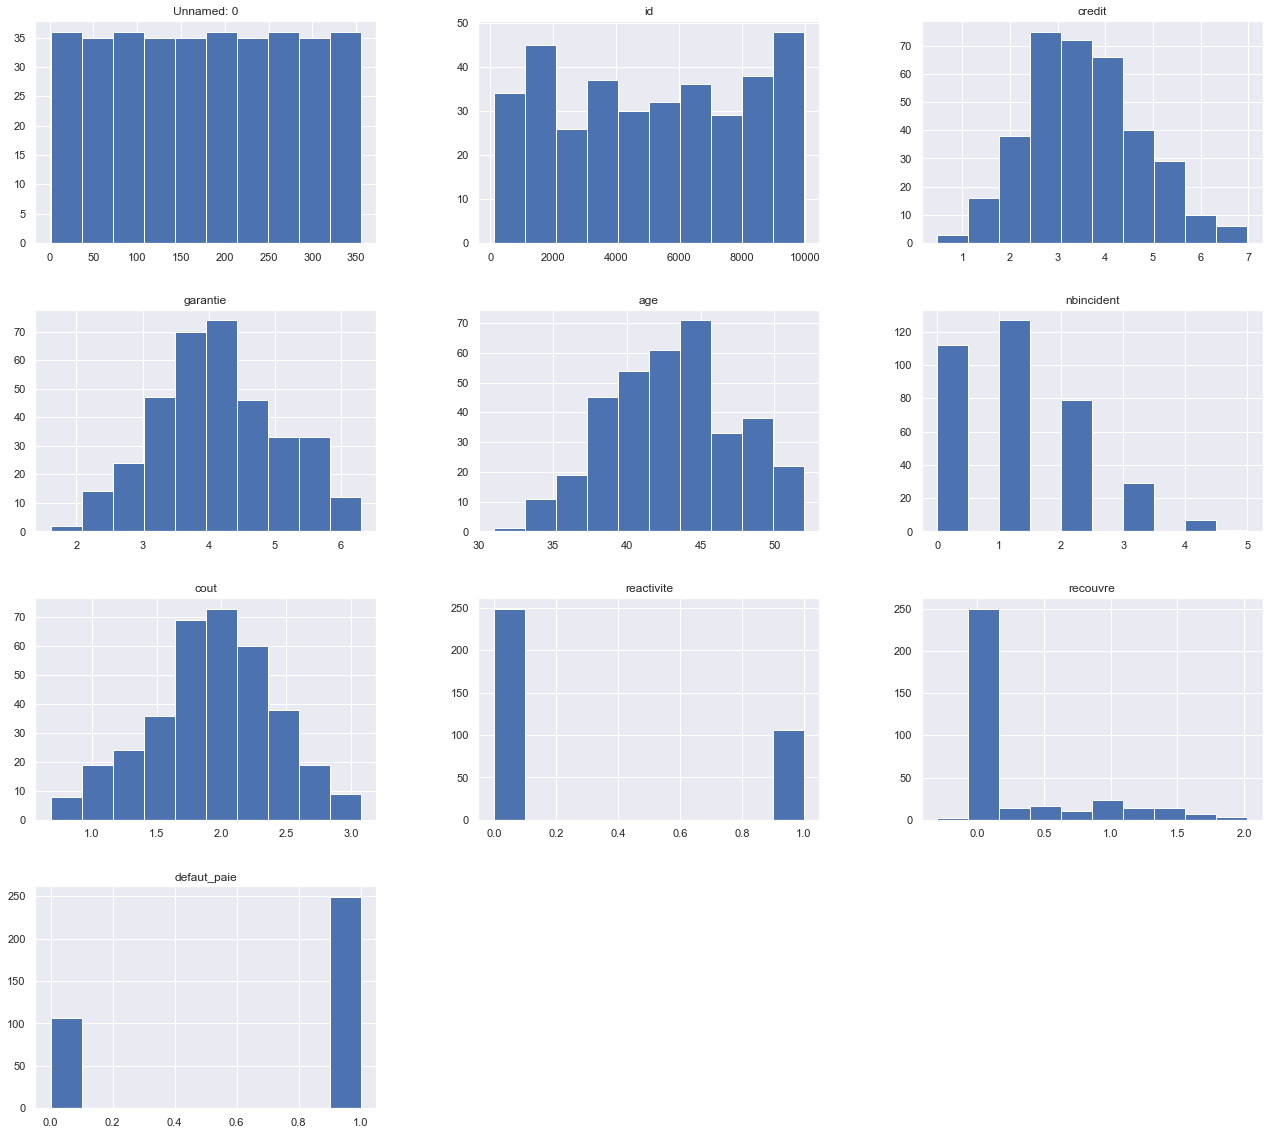

In [13]:
data.hist( figsize = (22, 20) )
plt.show()

In [14]:
data["defaut_paie"].value_counts()

1    249
0    106
Name: defaut_paie, dtype: int64

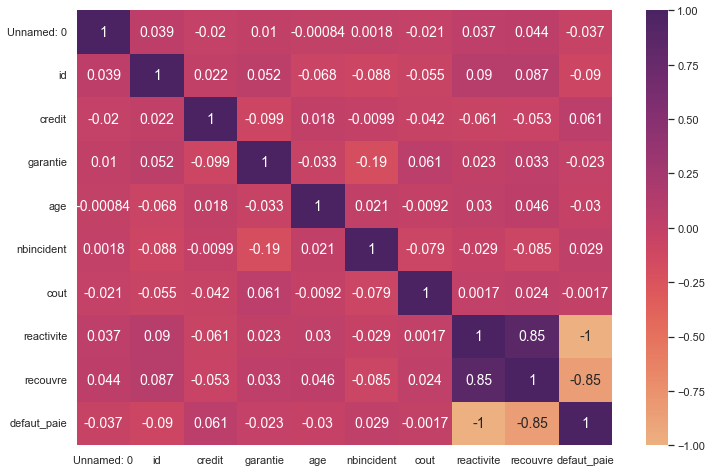

In [15]:
fig, ax = plt.subplots( figsize = (12,8) )

corr_matrix = data.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})

plt.show()

In [16]:
def categorical_valcount_hist(feature):
    print(data[feature].value_counts())
    fig, ax = plt.subplots( figsize = (6,6) )
    sns.countplot(x=feature, ax=ax, data=data)
    plt.show()

Marié         226
Divorcé        82
Celibatire     24
Autre          23
Name: matrim, dtype: int64


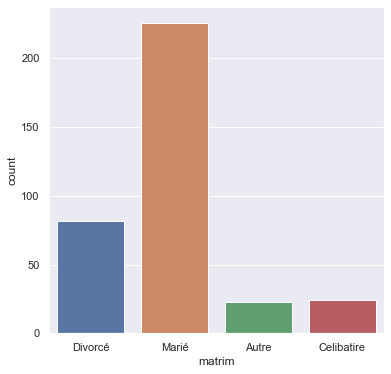

In [17]:
categorical_valcount_hist("matrim")

Bac+            160
Bac+5           138
Traditionnel     36
Primaire         19
Autres            2
Name: education, dtype: int64


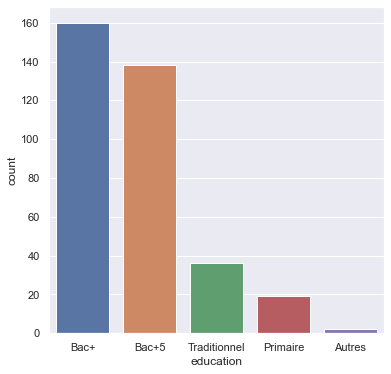

In [18]:
categorical_valcount_hist("education")

Homme    264
Femme     91
Name: sexe, dtype: int64


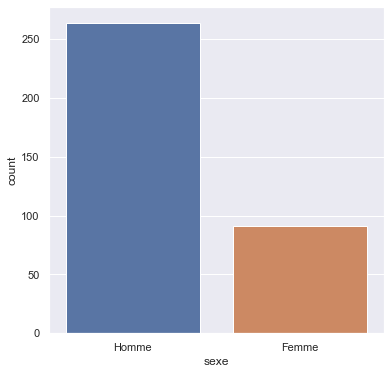

In [19]:
categorical_valcount_hist("sexe")

In [20]:
print( "Total categories in Secteur:", len( data["secteur"].unique() ) )
print()
data["secteur"].value_counts()

Total categories in Secteur: 7



agriculture    77
commerce       74
tourisme       68
services       52
industrie      45
tic            36
autres          3
Name: secteur, dtype: int64

In [21]:


data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   355 non-null    int64  
 1   id           355 non-null    int64  
 2   matrim       355 non-null    object 
 3   credit       355 non-null    float64
 4   garantie     355 non-null    float64
 5   nat_garnt    355 non-null    object 
 6   age          355 non-null    int64  
 7   csp          355 non-null    object 
 8   sexe         355 non-null    object 
 9   nbincident   355 non-null    int64  
 10  cout         355 non-null    float64
 11  education    355 non-null    object 
 12  secteur      355 non-null    object 
 13  reactivite   355 non-null    int64  
 14  recouvre     355 non-null    float64
 15  defaut_paie  355 non-null    int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 44.5+ KB


<AxesSubplot:xlabel='defaut_paie', ylabel='credit'>

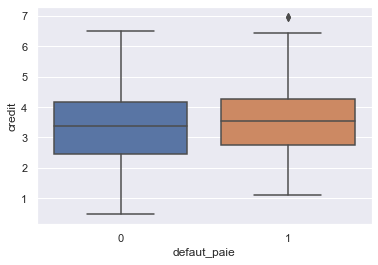

In [22]:
sns.boxplot(x ="defaut_paie",y="credit" ,data = data)


<AxesSubplot:xlabel='defaut_paie', ylabel='garantie'>

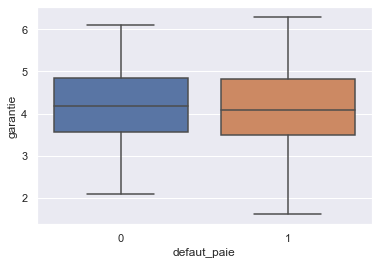

In [23]:
sns.boxplot(x ="defaut_paie",y="garantie" ,data = data)


<AxesSubplot:xlabel='defaut_paie', ylabel='age'>

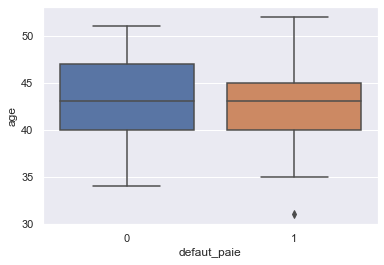

In [24]:
sns.boxplot(x ="defaut_paie",y="age" ,data = data)


<AxesSubplot:xlabel='defaut_paie', ylabel='nbincident'>

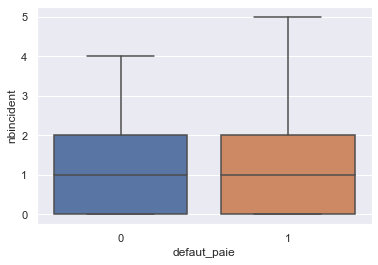

In [25]:
sns.boxplot(x ="defaut_paie",y="nbincident" ,data = data)

<AxesSubplot:xlabel='csp', ylabel='count'>

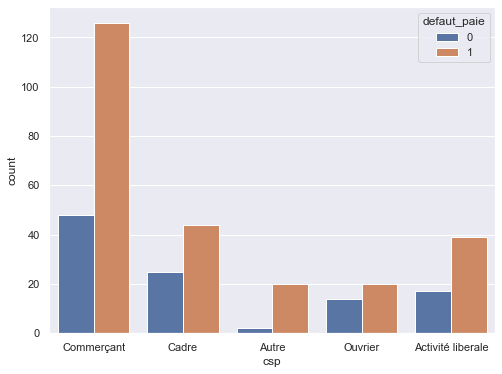

In [26]:
fig, ax = plt.subplots( figsize = (8, 6) )
sns.countplot(x='csp', hue='defaut_paie', ax=ax, data=data)

<AxesSubplot:xlabel='nat_garnt', ylabel='count'>

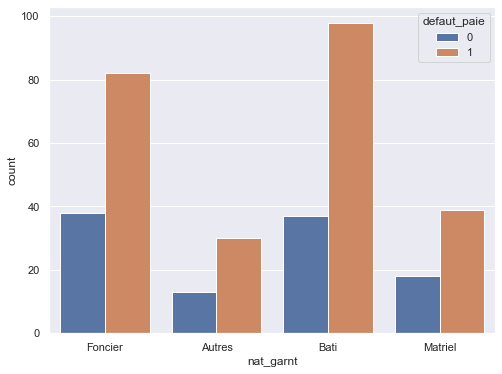

In [27]:
fig, ax = plt.subplots( figsize = (8, 6) )
sns.countplot(x='nat_garnt', hue='defaut_paie', ax=ax, data=data)

<AxesSubplot:xlabel='matrim', ylabel='count'>

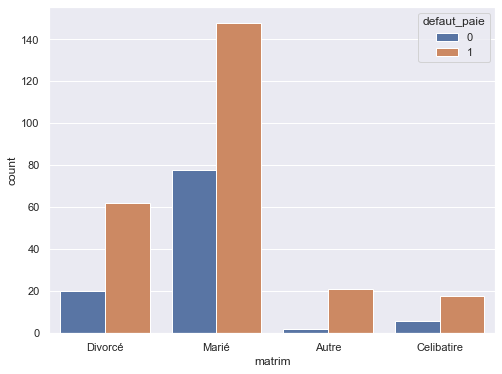

In [28]:
fig, ax = plt.subplots( figsize = (8, 6) )
sns.countplot(x='matrim', hue='defaut_paie', ax=ax, data=data)

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   355 non-null    int64  
 1   id           355 non-null    int64  
 2   matrim       355 non-null    object 
 3   credit       355 non-null    float64
 4   garantie     355 non-null    float64
 5   nat_garnt    355 non-null    object 
 6   age          355 non-null    int64  
 7   csp          355 non-null    object 
 8   sexe         355 non-null    object 
 9   nbincident   355 non-null    int64  
 10  cout         355 non-null    float64
 11  education    355 non-null    object 
 12  secteur      355 non-null    object 
 13  reactivite   355 non-null    int64  
 14  recouvre     355 non-null    float64
 15  defaut_paie  355 non-null    int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 44.5+ KB


In [31]:
label_encoder = LabelEncoder()

for col in ['matrim','education']:
    data[col] = label_encoder.fit_transform( data[col] )

In [32]:
onehot_encoder = OneHotEncoder(sparse = False)
data['secteur'] = onehot_encoder.fit_transform(data['secteur'].values.reshape(-1, 1) )

In [33]:
high_card_features = ['csp', 'nat_garnt']

count_encoder = ce.CountEncoder()

# Transform the features, rename the columns with the _count suffix, and join to dataframe
count_encoded = count_encoder.fit_transform( data[high_card_features] )
data = data.join(count_encoded.add_suffix("_count"))

In [34]:
data.head()

,Unnamed: 0,id,matrim,credit,garantie,nat_garnt,age,csp,sexe,nbincident,cout,education,secteur,reactivite,recouvre,defaut_paie,csp_count,nat_garnt_count
0,1,6671,2,4.153989,4.302526,Foncier,43,Commerçant,Homme,1,2.034492,1,1.0,0,0.00000,1,174,120
1,2,5472,2,2.787130,3.242960,Autres,36,Commerçant,Homme,1,2.739116,2,0.0,0,0.00000,1,174,43
2,3,6056,3,3.882697,3.484327,Bati,47,Cadre,Homme,1,2.238012,1,0.0,0,0.00000,1,69,135
3,4,8562,2,2.487469,3.567551,Foncier,45,Autre,Femme,3,2.131952,2,1.0,1,0.34992,0,22,120
4,5,4629,2,2.532344,4.263836,Matriel,45,Cadre,Homme,1,2.211442,2,0.0,0,0.00000,1,69,57


In [35]:
data= data.drop(labels=['csp', 'nat_garnt'], axis=1)
onehot_encoder = OneHotEncoder(sparse = False)
data['sexe'] = onehot_encoder.fit_transform(data['sexe'].values.reshape(-1, 1) )

In [36]:
data.head()

,Unnamed: 0,id,matrim,credit,garantie,age,sexe,nbincident,cout,education,secteur,reactivite,recouvre,defaut_paie,csp_count,nat_garnt_count
0,1,6671,2,4.153989,4.302526,43,0.0,1,2.034492,1,1.0,0,0.00000,1,174,120
1,2,5472,2,2.787130,3.242960,36,0.0,1,2.739116,2,0.0,0,0.00000,1,174,43
2,3,6056,3,3.882697,3.484327,47,0.0,1,2.238012,1,0.0,0,0.00000,1,69,135
3,4,8562,2,2.487469,3.567551,45,1.0,3,2.131952,2,1.0,1,0.34992,0,22,120
4,5,4629,2,2.532344,4.263836,45,0.0,1,2.211442,2,0.0,0,0.00000,1,69,57


In [37]:
x = data.drop("defaut_paie", axis=1)
y = data["defaut_paie"]

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 7)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [40]:
rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)

smote_sampler = SMOTE(random_state=9)

pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', rf_clf]])

pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 100.0
Precision: 100.0
F1-Score: 100.0
Accuracy score: 100.0
AUC Score: 100.0


In [48]:
import gradio as gr
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

# Step 1: Load the data and preprocess
data = pd.read_excel('C:/Users/HP/Downloads/stage/Donneé/Etude_scoring.xlsx')
data = data.drop(['id', 'sexe', 'nbincident', 'cout', 'recouvre'], axis=1)

X = data.drop(['defaut_paie'], axis=1)
y = data['defaut_paie']

# Handle categorical values
categorical_features = ['matrim', 'nat_garnt', 'csp', 'education', 'secteur']
for feature in categorical_features:
    X[feature] = X[feature].astype('category')

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)], remainder='passthrough')

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SGDClassifier(loss='log'))])

clf.fit(X, y)

# Step 8: Evaluate the model
y_pred = clf.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')


Accuracy Score: 1.0
Confusion Matrix: 
[[26  0]
 [ 0 45]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        45

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71



In [ ]:
# Step 2: Define the prediction function
def predict_loan_default(matrim, credit, garantie, nat_garnt, age, csp, education, secteur, reactivite):
    input_data = pd.DataFrame({
        'matrim': [matrim],
        'credit': [credit],
        'garantie': [garantie],
        'nat_garnt': [nat_garnt],
        'age': [age],
        'csp': [csp],
        'education': [education],
        'secteur': [secteur],
        'reactivite': [reactivite]
    })
    input_data['nat_garnt'] = input_data['nat_garnt'].astype('category')  # Convert to categorical
    prediction = clf.predict(input_data)[0]
    return 'Default' if prediction == 1 else 'No default'


# Step 3: Define the Gradio interface
iface = gr.Interface(
    fn=predict_loan_default,
    inputs=[
        gr.inputs.Dropdown(['Marié', 'Divorcé', 'Autre'], label='Matrim'),
        gr.inputs.Number(label='Credit'),
        gr.inputs.Number(label='Garantie'),
        gr.inputs.Dropdown(['Foncier', 'Bati', 'Autres', 'Matriel'], label='Nat_Garnt'),
        gr.inputs.Number(label='Age'),
        gr.inputs.Dropdown(['Commerçant', 'Cadre', 'Autre'], label='CSP'),
        gr.inputs.Dropdown(['Bac+', 'Bac+5', 'Traditionnel'], label='Education'),
        gr.inputs.Dropdown(['agriculture', 'commerce', 'tourisme', 'tic', 'industrie'], label='Secteur'),
        gr.inputs.Number(label='Reactivite')
    ],
    outputs=gr.outputs.Textbox(label='Prediction')
)

# Step 4: Launch the interface
iface.launch()

C:\Users\HP\anaconda3\lib\site-packages\gradio\inputs.py:217: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\HP\anaconda3\lib\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\gradio\outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.
